In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE

In [23]:
bovespa = pd.read_csv('bovespa.csv')
bovespa = bovespa[bovespa['Date'] > 20150101]
bovespa = bovespa[bovespa['Codneg'].isin(companies)]
print(bovespa.shape)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(86888, 18)


In [81]:
bovespa['var'] = (bovespa['Close'] - bovespa['Open']) / bovespa['Open']
bovespa_var = bovespa.loc[:,['Date','Codneg', 'var']]

companies = []
movements = []

for index, values in bovespa_var.iterrows():
    stock_name = values['Codneg']
    stock_var = values['var']
    
    if stock_name not in companies and len(stock_name.strip()) <=5:
        companies.append(stock_name)
        
        aux_list = []
        for index, values in bovespa_var.iterrows():
            if values['Codneg'] == stock_name:
                aux_list.append(values['var'])
        
        movements.append(aux_list)
        
print(companies)
print(movements)

['ABEV3       ', 'ALLL3       ', 'BBAS3       ', 'BBDC3       ', 'BBDC4       ', 'BBRK3       ', 'BBSE3       ', 'BEEF3       ', 'BHGR3       ', 'BPAN4       ', 'BRAP4       ', 'BRFS3       ', 'BRKM5       ', 'BRML3       ', 'BRPR3       ', 'BRSR6       ', 'BTOW3       ', 'BVMF3       ', 'CCRO3       ', 'CCXC3       ', 'CESP6       ', 'CIEL3       ', 'CMIG3       ', 'CMIG4       ', 'CPFE3       ', 'CPLE6       ', 'CPRE3       ', 'CRUZ3       ', 'CSNA3       ', 'CTAX4       ', 'CTIP3       ', 'CVCB3       ', 'CYRE3       ', 'DTEX3       ', 'ECOR3       ', 'ELET3       ', 'ELET6       ', 'EMBR3       ', 'ENEV3       ', 'EQTL3       ', 'ESTC3       ', 'ETER3       ', 'EVEN3       ', 'FIBR3       ', 'FLRY3       ', 'GETI4       ', 'GFSA3       ', 'GGBR3       ', 'GGBR4       ', 'GOAU4       ', 'GOLL4       ', 'HGTX3       ', 'HYPE3       ', 'IGTA3       ', 'IMCH3       ', 'INET3       ', 'ITSA3       ', 'ITSA4       ', 'ITUB3       ', 'ITUB4       ', 'JBSS3       ', 'JHSF3       ', 'JSLG3 

In [108]:
bovespa_var.loc[:, "datetimeobj"] = bovespa_var.loc[:, "Date"].apply(lambda x : datetime.datetime.strptime(str(x), "%Y%m%d"))
bovespa.loc[:, "datetimeobj"] = bovespa.loc[:, "Date"].apply(lambda x : datetime.datetime.strptime(str(x), "%Y%m%d"))

In [97]:
for a in movements:
    if(len(a) != 828):
        index = movements.index(a)
        del movements[index]
        del companies[index]

movements = np.array(movements)

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels     companies
19       0  CMIG4       
21       0  CPLE6       
20       0  CPFE3       
72       0  SAPR4       
18       0  CMIG3       
50       0  JHSF3       
16       0  CESP6       
51       0  JSLG3       
14       0  BTOW3       
26       0  ECOR3       
36       0  FLRY3       
31       0  EQTL3       
27       1  ELET3       
28       1  ELET6       
74       2  SMTO3       
44       2  IGTA3       
76       2  TOTS3       
12       2  BRPR3       
60       3  OIBR3       
61       3  OIBR4       
52       4  KROT3       
32       4  ESTC3       
73       4  SEER3       
45       5  ITSA3       
43       5  HYPE3       
42       5  HGTX3       
0        5  ABEV3       
47       5  ITUB3       
48       5  ITUB4       
53       5  LAME3       
..     ...           ...
17       5  CIEL3       
1        5  BBAS3       
23       5  CVCB3       
24       5  CYRE3       
25       5  DTEX3       
75       5  TIMP3       
69       5  RENT3       
34       5  EVEN3       


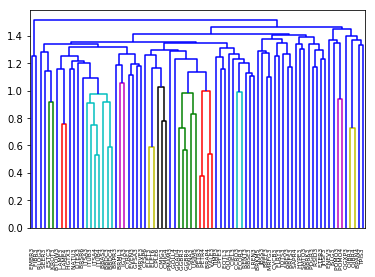

<Figure size 10800x10440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [92]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.figure(figsize=(150, 145))
plt.show()
plt.clf()

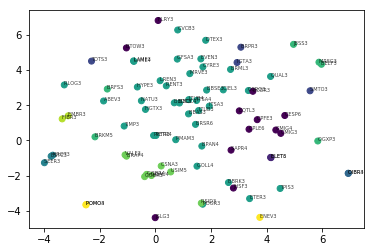

<Figure size 10800x10440 with 0 Axes>

In [126]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
    
plt.scatter(xs, ys, c=labels)
plt.figure(figsize=(150, 145))
plt.show()

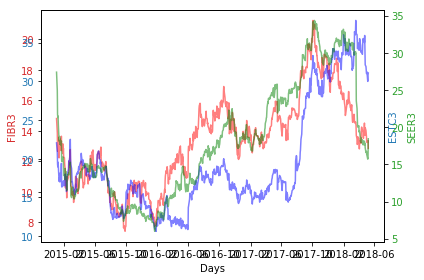

<Figure size 432x288 with 0 Axes>

In [121]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('FIBR3', color=color)
plt.plot_date(bovespa[bovespa['Codneg'] == 'KROT3       ']['datetimeobj'], bovespa[bovespa['Codneg'] == 'KROT3       ']['Close'], xdate=True, ydate=False, linestyle='solid', marker='None', color='red', alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ESTC3', color=color)  # we already handled the x-label with ax1
ax2.plot_date(bovespa[bovespa['Codneg'] == 'ESTC3       ']['datetimeobj'], bovespa[bovespa['Codneg'] == 'ESTC3       ']['Close'], xdate=True, ydate=False, linestyle='solid', marker='None', color='blue', alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax3.set_ylabel('SEER3', color=color)  # we already handled the x-label with ax1
ax3.plot_date(bovespa[bovespa['Codneg'] == 'SEER3       ']['datetimeobj'], bovespa[bovespa['Codneg'] == 'SEER3       ']['Close'], xdate=True, ydate=False, linestyle='solid', marker='None', color='green', alpha=0.5)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.clf()